In [1]:
import pandas as pd
import scanpy as sc
import json
import numpy as np
import matplotlib.pyplot as plt

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**GSE173787**

Geni differenzialmente espressi (DEGs) identificati dall'analisi trascrittomica di cellule B CD19+ al momento dell'insorgenza della malattia, evidenziando alterazioni nel pathway di attivazione del complemento e in vie legate alla differenziazione e attivazione dei linfociti B.

Samples from PBMC cells.

In [2]:
# read data
data_GSE173787 = pd.read_excel('data/GSE173787/pnas.2111920118.sd08.xlsx') # GSE173787
data_GSE173787

,Gene name,logFC,logCPM,P value,FDR
0,ARHGAP31,0.819578,4.471801,9.720000e-05,0.006011
1,TRIB1,1.508544,6.125172,9.500000e-05,0.005918
2,E2F2,1.757939,3.132182,9.460000e-06,0.001635
3,TAPBPL,0.625243,4.549739,9.110000e-05,0.005695
4,MYO1D,1.491649,4.945613,9.100000e-07,0.000398
...,...,...,...,...,...
542,APBB1,-0.695130,4.786609,1.269600e-04,0.007116
543,H1-3,-2.155091,1.245875,1.258320e-04,0.007116
544,BEX4,-0.709985,4.886337,1.213630e-04,0.007106
545,SECISBP2L,-0.581726,7.028738,1.190150e-04,0.006997


In [3]:
data_GSE173787.describe()

,logFC,logCPM,P value,FDR
count,547.000000,547.000000,5.470000e+02,5.470000e+02
mean,0.867693,3.694050,6.739536e-04,1.533279e-02
std,1.168716,2.203180,8.423388e-04,1.377024e-02
min,-3.100633,-0.385852,6.060000e-13,1.010000e-08
25%,0.594391,1.843997,3.565000e-05,3.318201e-03
50%,1.017172,3.561394,2.643350e-04,1.066899e-02
75%,1.641794,5.147900,1.072253e-03,2.516287e-02
max,6.620761,12.059500,3.259711e-03,4.995920e-02


In [4]:
data_GSE173787[np.abs(data_GSE173787['logFC']) > 0.5]

,Gene name,logFC,logCPM,P value,FDR
0,ARHGAP31,0.819578,4.471801,9.720000e-05,0.006011
1,TRIB1,1.508544,6.125172,9.500000e-05,0.005918
2,E2F2,1.757939,3.132182,9.460000e-06,0.001635
3,TAPBPL,0.625243,4.549739,9.110000e-05,0.005695
4,MYO1D,1.491649,4.945613,9.100000e-07,0.000398
...,...,...,...,...,...
542,APBB1,-0.695130,4.786609,1.269600e-04,0.007116
543,H1-3,-2.155091,1.245875,1.258320e-04,0.007116
544,BEX4,-0.709985,4.886337,1.213630e-04,0.007106
545,SECISBP2L,-0.581726,7.028738,1.190150e-04,0.006997


In [5]:
data_GSE173787[(data_GSE173787['P value'] < 1e-30) & (np.abs(data_GSE173787['logFC']) > 0.5)]

,Gene name,logFC,logCPM,P value,FDR


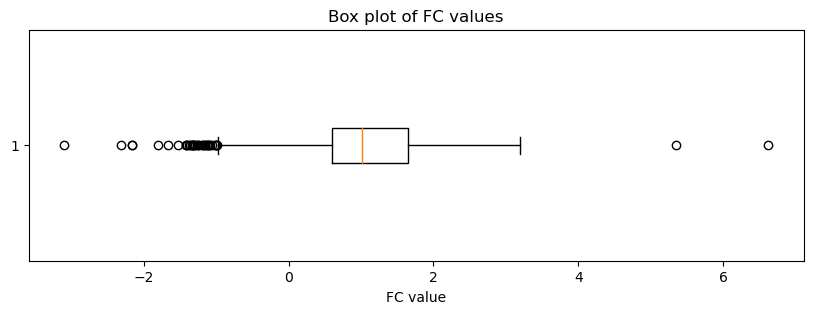

In [6]:
# FC (fold change) values: measure describing how much a quantity changes between an original and a subsequent measurement
plt.figure(figsize=(10, 3))
plt.boxplot(data_GSE173787['logFC'], vert=False)
plt.title('Box plot of FC values')
plt.xlabel('FC value')
plt.show()

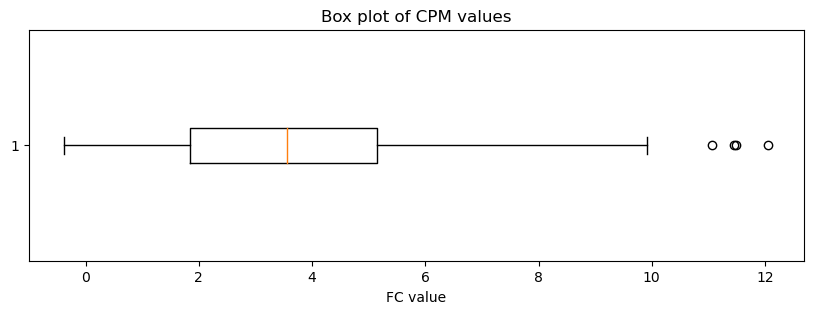

In [7]:
# LogCPM (log counts per million): measuring expression level
plt.figure(figsize=(10, 3))
plt.boxplot(data_GSE173787['logCPM'], vert=False)
plt.title('Box plot of CPM values')
plt.xlabel('FC value')
plt.show()

In [8]:
# reorder gene in log FC order
genes_FC = data_GSE173787.sort_values(by='logFC', ascending=False)['Gene name'].tolist()
values_logFC = data_GSE173787.sort_values(by='logFC', ascending=False)['logFC'].tolist()

genes_CPM = data_GSE173787.sort_values(by='logCPM', ascending=False)['Gene name'].tolist()
values_logCPM = data_GSE173787.sort_values(by='logCPM', ascending=False)['logCPM'].tolist()

In [9]:
genes_GSE173787 = pd.DataFrame(columns=['Gene FC', 'logFC', 'Gene CPM', 'logCPM'])
genes_GSE173787['Gene FC'] = genes_FC
genes_GSE173787['logFC'] = values_logFC
genes_GSE173787['Gene CPM'] = genes_CPM
genes_GSE173787['logCPM'] = genes_CPM

genes_GSE173787[:20]

,Gene FC,logFC,Gene CPM,logCPM
0,HBA2,6.620761,IGKC,IGKC
1,HBB,5.351197,IGHA1,IGHA1
2,RRM2,3.191933,TSC22D3,TSC22D3
3,MKI67,3.139837,KLF6,KLF6
4,LRRIQ1,3.041682,ACTG1,ACTG1
5,NLRP7,3.034133,IGHG1,IGHG1
6,PDLIM3,3.005873,HSP90B1,HSP90B1
7,TSHR,2.892193,JCHAIN,JCHAIN
8,E2F7,2.878953,IGHG2,IGHG2
9,IGLC7,2.777498,IGHA2,IGHA2


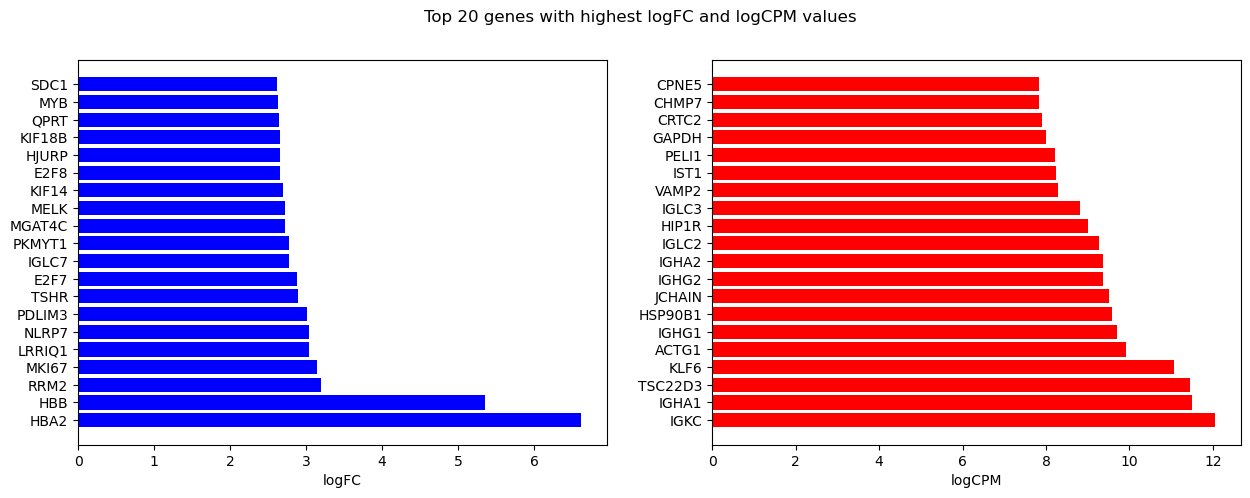

In [10]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].barh(genes_FC[:20], values_logFC[:20], color='blue')
axs[0].set_xlabel('logFC')

axs[1].barh(genes_CPM[:20], values_logCPM[:20], color='red')
axs[1].set_xlabel('logCPM')

fig.suptitle('Top 20 genes with highest logFC and logCPM values')
plt.show()

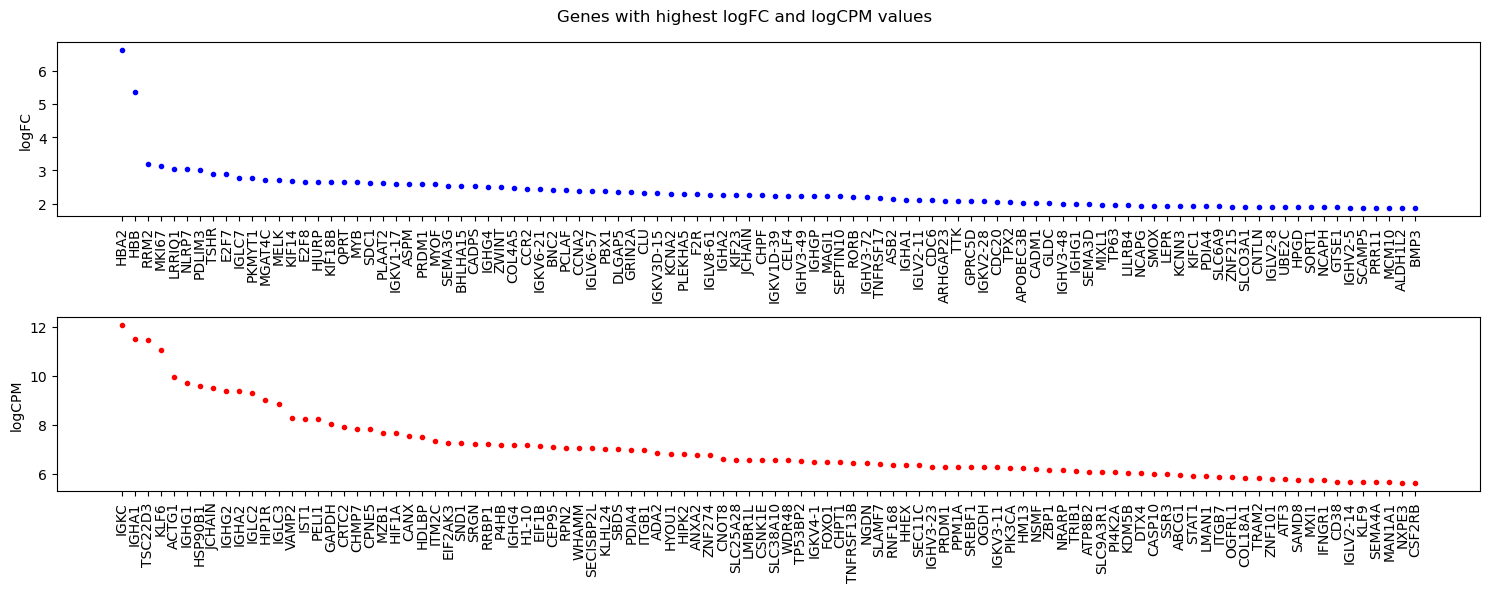

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6))
axs[0].plot(values_logFC[:100], '.', color='blue')
axs[0].set_ylabel('logFC')
axs[0].set_xticks(np.arange(0, 100), genes_FC[:100], rotation='vertical')

axs[1].plot(values_logCPM[:100], '.', color='red')
axs[1].set_ylabel('logCPM')
axs[1].set_xticks(np.arange(0, 100), genes_CPM[:100], rotation='vertical')

fig.suptitle('Genes with highest logFC and logCPM values')
plt.tight_layout()
plt.show()

**Transcriptomic data**

In [12]:
B_cells_PBMC_markers = json.load(open('results/significant_genes_B_cells_PBMC.json'))

In [13]:
B_cells_PBMC_markers_downregulated = B_cells_PBMC_markers['down_regulated_genes_MS'] # logFC < -0.5
B_cells_PBMC_markers_upregulated = B_cells_PBMC_markers['up_regulated_genes_MS'] # logFC > 0.5

### Comparison

In [16]:
data_GSE173787_upregulated = data_GSE173787[data_GSE173787['logFC'] > 0.5]
data_GSE173787_downregulated = data_GSE173787[data_GSE173787['logFC'] < -0.5]

In [17]:
from matplotlib_venn import venn2

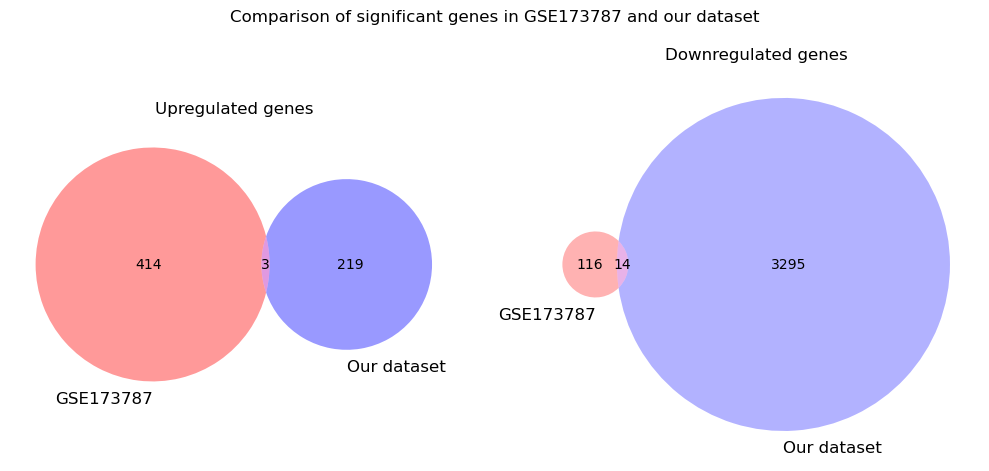

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

venn2(subsets=(set(data_GSE173787_upregulated['Gene name']), set(B_cells_PBMC_markers_upregulated)),
    set_labels=('GSE173787', 'Our dataset'), alpha=0.4, set_colors=('r', 'b'), ax=axs[0])
axs[0].set_title('Upregulated genes')

venn2(subsets=(set(data_GSE173787_downregulated['Gene name']), set(B_cells_PBMC_markers_downregulated)),
    set_labels=('GSE173787', 'Our dataset'), alpha=0.3, set_colors=('r', 'b'), ax=axs[1])
axs[1].set_title('Downregulated genes')

fig.suptitle('Comparison of significant genes in GSE173787 and our dataset')
plt.tight_layout()
plt.show()

In [32]:
print('Number of upregulated genes in GSE173787:', len(data_GSE173787_upregulated))
print('Number of downregulated genes in GSE173787:', len(data_GSE173787_downregulated))

print('Number of upregulated genes in our dataset:', len(B_cells_PBMC_markers_upregulated))
print('Number of downregulated genes in our dataset:', len(B_cells_PBMC_markers_downregulated))

Number of upregulated genes in GSE173787: 417
Number of downregulated genes in GSE173787: 130
Number of upregulated genes in our dataset: 222
Number of downregulated genes in our dataset: 3309


In [33]:
# common upregulated genes
common_upregulated_genes = set(data_GSE173787_upregulated['Gene name']).intersection(set(B_cells_PBMC_markers_upregulated))
common_downregulated_genes = set(data_GSE173787_downregulated['Gene name']).intersection(set(B_cells_PBMC_markers_downregulated))

print('Number of common upregulated genes:', len(common_upregulated_genes))
print('Number of common downregulated genes:', len(common_downregulated_genes))

Number of common upregulated genes: 3
Number of common downregulated genes: 14


In [36]:
data_GSE173787[data_GSE173787['Gene name'].isin(common_upregulated_genes)]

,Gene name,logFC,logCPM,P value,FDR
39,IGLC3,1.734479,8.825095,0.000006,0.001305
103,IGLC2,1.614845,9.270146,0.000021,0.002547
105,IGKC,1.456564,12.059500,0.000018,0.002281


In [38]:
data_GSE173787[data_GSE173787['Gene name'].isin(common_upregulated_genes)].describe()

,logFC,logCPM,P value,FDR
count,3.000000,3.000000,3.000000,3.000000
mean,1.601962,10.051581,0.000015,0.002044
std,0.139405,1.753090,0.000008,0.000654
min,1.456564,8.825095,0.000006,0.001305
25%,1.535704,9.047621,0.000012,0.001793
50%,1.614845,9.270146,0.000018,0.002281
75%,1.674662,10.664823,0.000019,0.002414
max,1.734479,12.059500,0.000021,0.002547


In [37]:
data_GSE173787[data_GSE173787['Gene name'].isin(common_downregulated_genes)]

,Gene name,logFC,logCPM,P value,FDR
417,CCDC28A,-0.633383,4.571976,9.760000e-05,0.006011
423,OGFRL1,-0.653756,5.854291,9.480000e-06,0.001635
433,BRI3,-0.883763,5.125812,6.990000e-07,0.000342
456,HSPB1,-1.253477,5.521785,3.170000e-06,0.000936
458,IFNGR1,-0.645201,5.724747,3.140000e-05,0.003181
466,MID1IP1,-0.699969,4.842259,2.460000e-05,0.002840
472,CSNK1E,-0.609855,6.559223,1.680000e-06,0.000681
487,EMC6,-1.004467,-0.015835,3.259711e-03,0.049959
497,DUSP6,-0.619432,4.131075,1.857473e-03,0.034529
527,NDUFV2,-1.160605,2.973905,3.253000e-04,0.012049


In [39]:
data_GSE173787[data_GSE173787['Gene name'].isin(common_downregulated_genes)].describe()

,logFC,logCPM,P value,FDR
count,14.000000,14.000000,1.400000e+01,14.000000
mean,-0.844008,4.236894,4.593139e-04,0.010650
std,0.264475,1.998752,9.371452e-04,0.014281
min,-1.417982,-0.015835,6.990000e-07,0.000342
25%,-0.974291,3.820170,1.326000e-05,0.001936
50%,-0.706115,4.864298,1.094815e-04,0.006559
75%,-0.647340,5.475096,2.444357e-04,0.010187
max,-0.609855,6.559223,3.259711e-03,0.049959
